# Introduction

Welcome to this notebook! Here, we will use the NYC Property Sales dataset to build a machine learning model that predicts the **"SALE PRICE"** of properties in New York City.  
*Bu notebookta, New York City'deki emlak satış verilerini kullanarak **"SALE PRICE"** (satış fiyatı) tahmini yapan bir makine öğrenmesi modeli geliştireceğiz.*

---

## Dataset Overview

- **Source:** [Kaggle - NYC Property Sales](https://www.kaggle.com/datasets/new-york-city/nyc-property-sales)  
    *(Veri Kaynağı: NYC Property Sales Kaggle veri seti)*

- **Target Column:** `SALE PRICE`  
    *(Hedef Kolon)*

---

## Objectives

- **Exploratory Data Analysis (EDA)**  
    Understand the structure and distribution of the dataset, especially the target variable `SALE PRICE`.  
    *(Veri kümesinin yapısını ve özellikle hedef değişken olan `SALE PRICE` dağılımını incelemek)*

- **Data Preprocessing**  
    Handle missing values and duplicates, clean and prepare the data.  
    *(Eksik değerler ve yinelenen kayıtlarla ilgilenmek, veriyi temizlemek ve hazırlamak)*

- **Feature Engineering**  
    Select and encode relevant features (e.g., building type, neighborhood, year built, etc.).  
    *(İlgili özellikleri seçmek ve kodlamak (ör. bina tipi, mahalle, inşa yılı, vb.))*  

- **Model Training & Evaluation**  
    Train regression models (Ridge, XGBoost) to predict `SALE PRICE` and evaluate with MSE, MAE, R².  
    *(Regresyon modelleri (Ridge, XGBoost) ile `SALE PRICE` tahmini yapmak ve MSE, MAE, R² ile değerlendirmek)*

---

Let's get started!  
*Haydi başlayalım!*

# Importing Necessary Libraries


Here, we import the essential Python libraries for data analysis, visualization, and machine learning.  
*(Bu bölümde, finansal verilerle çalışmak için gerekli Python kütüphanelerini içe aktaracağız.  )*

In [41]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import seaborn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

import sys
sys.path.append('./UI')
from columns import Column as Col

# Exploratory Data Analysis (EDA)

## 1. Data Loading & Inspection  
The dataset is loaded, and a quick overview of the data is performed..    
*(Veri seti yükleniyor ve veriye hızlı bir genel bakış yapılıyor.)*  

First, the NYC Property Sales dataset is imported. The size of the dataset (number of rows and columns) is printed, and the first few rows are displayed to get an initial understanding of the data. Data types and summary statistics (mean, std, min, max, etc.) are also checked to better understand the structure and contents of the dataset.  
*(İlk olarak NYC Property Sales veri seti içe aktarılır. Veri setinin boyutu (satır ve sütun sayısı) yazdırılır ve ilk birkaç satır görüntülenerek veri hakkında genel bir fikir edinilir. Veri tipleri ve özet istatistikler (ortalama, std, min, max vb.) incelenerek veri setinin yapısı ve içeriği daha iyi anlaşılır.)*

In [42]:
# load dataset
df_ori = pandas.read_csv("./UI/nyc-rolling-sales.csv", encoding = "utf-8", delimiter = ",")

# print size of the rows and columns
print("The size of the dataset is (rows x columns): ", df_ori.shape)

The size of the dataset is (rows x columns):  (84548, 22)


In [43]:
# quick look to the first 5 rows of the dataset
df_ori.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [44]:
# inspecting data types
df_ori.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [45]:
# inspecting mean, std, min etc values of dataframe
df_ori.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,84548.0,10344.359878,7151.779436,4.0,4231.00,8942.0,15987.25,26739.0
BOROUGH,84548.0,2.998758,1.289790,1.0,2.00,3.0,4.00,5.0
BLOCK,84548.0,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
ZIP CODE,84548.0,10731.991614,1290.879147,0.0,10305.00,11209.0,11357.00,11694.0
RESIDENTIAL UNITS,84548.0,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
YEAR BUILT,84548.0,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


## 2. Missing Values & Duplicates  
Missing values and duplicate records are checked and reported.  
*(Eksik değerler ve yinelenen kayıtlar kontrol edilip raporlanır.)*

The dataset is examined for missing values in each column, and the number of missing entries is printed. Duplicate records are also identified and their count is displayed. This step ensures data quality before further analysis.  
*(Veri setindeki her sütunda eksik değerler kontrol edilir ve eksik kayıt sayısı yazdırılır. Ayrıca yinelenen kayıtlar tespit edilip sayısı gösterilir. Bu adım, sonraki analizler için veri kalitesini sağlamaya yöneliktir.)*


In [46]:
# checking missing values if there are any
missing = df_ori.isna().sum()
missing = missing[missing > 0]
print("Missing values in the dataset:")
for col, missing_number in missing.items():
    print(f"{col:<25}: {missing_number}")

Missing values in the dataset:


In [47]:
# checking duplicates if there are any
duplicates_count = df_ori.duplicated().sum()
print("Number of duplicated records:", duplicates_count)

# finding duplicate rows
# keep=False will mark all duplicates as True
duplicate_rows = df_ori[df_ori.duplicated(keep=False)]
duplicate_rows

Number of duplicated records: 0


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


## 3. Correlation Analysis  
Correlation among available numerical features is visualized to understand relationships in the data.  
*(Mevcut sayısal sütunlar arasındaki korelasyon görselleştirilerek veri içindeki ilişkiler anlaşılır.)*

At this stage, the `SALE PRICE` column is not yet converted to numeric, so it is not included in the correlation matrix. The heatmap shows the relationships between other numerical columns.  
*(Bu aşamada `SALE PRICE` sütunu henüz sayısal formata çevrilmediği için korelasyon matrisinde yer almamaktadır. Isı haritası, diğer sayısal sütunlar arasındaki ilişkileri göstermektedir.)*

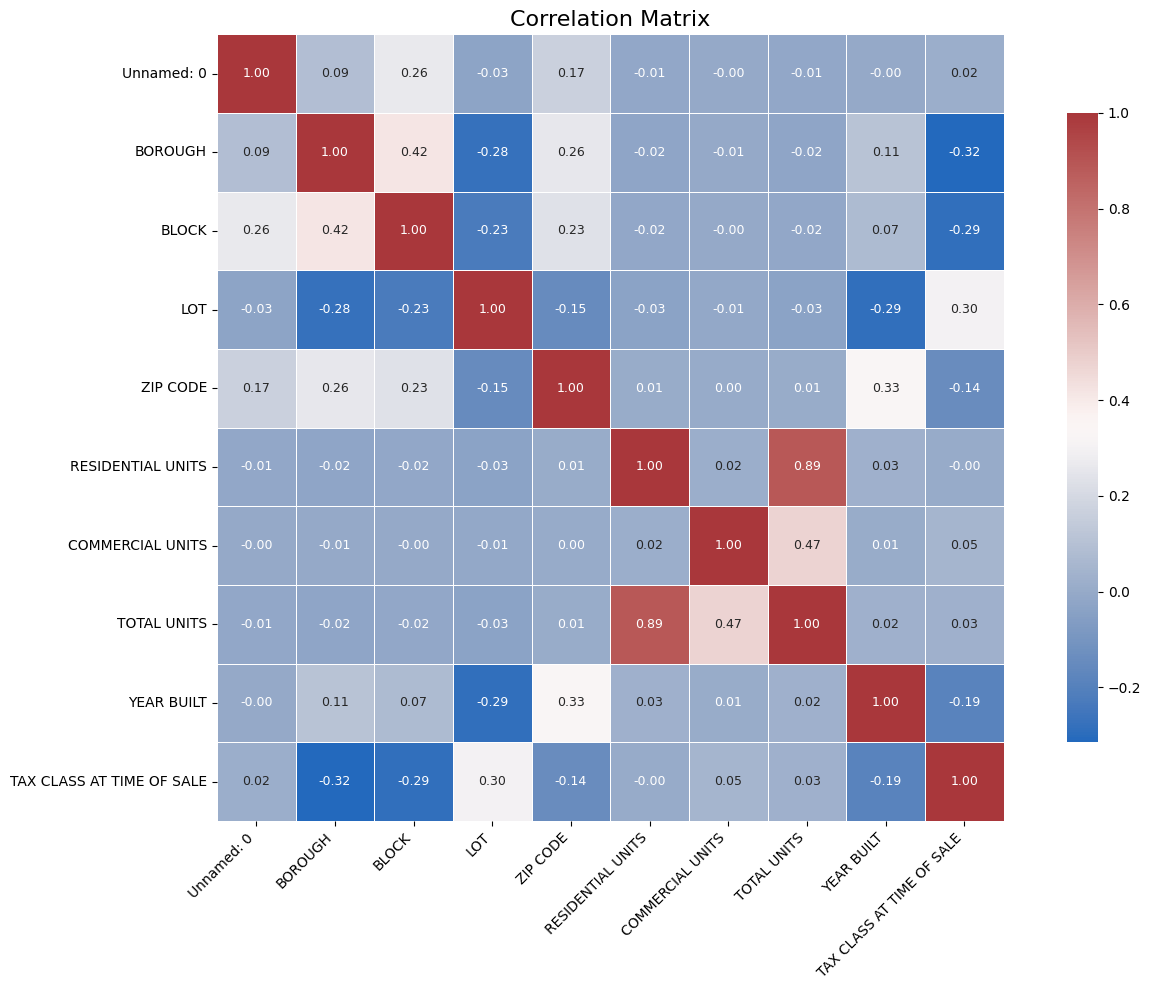

In [48]:
df_numbers = df_ori.select_dtypes(include=numpy.number)
corr = df_numbers.corr()
pyplot.figure(figsize=(14, 10))
seaborn.heatmap(
    corr,
    cmap="vlag",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True,
    annot_kws={"size": 9}
)

pyplot.title("Correlation Matrix", fontsize=16)
pyplot.xticks(rotation=45, ha="right", fontsize=10)
pyplot.yticks(fontsize=10)
pyplot.tight_layout()
pyplot.show()

# Data Preprocessing & Feature Engineering



## 4. Cleaning Data  
Data cleaning steps are applied to prepare the dataset for analysis.  
*(Veri setini analiz için hazırlamak amacıyla veri temizleme adımları uygulanır.)*

First, duplicate rows are removed. Then, columns that should be numeric (including `SALE PRICE`) are converted to numeric types by removing unwanted characters. Missing values in these columns are handled, and outliers in the target variable are filtered out.  
*(Öncelikle yinelenen satırlar kaldırılır. Ardından, sayısal olması gereken sütunlar (örn. `SALE PRICE`) gereksiz karakterlerden arındırılarak sayısal tipe dönüştürülür. Bu sütunlardaki eksik değerler temizlenir ve hedef değişkende (satış fiyatı) aykırı değerler filtrelenir.)*

>Although duplicate removal is applied as a precaution, there were no duplicate rows in the dataset.  
>*(Her ne kadar önlem olarak yinelenen satırlar kaldırılmış olsa da, veri setinde aslında yinelenen satır bulunmamaktadır.)*

In [49]:
# Removing duplicates to new copy
df_clean = df_ori.drop_duplicates(keep='first')

In [50]:
# fixing the data types
numeric_cols = [
    Col.UNNAMED_0,
    Col.BOROUGH,
    Col.BLOCK,
    Col.LOT,
    Col.ZIP_CODE,
    Col.RESIDENTIAL_UNITS,
    Col.COMMERCIAL_UNITS,
    Col.TOTAL_UNITS,
    Col.LAND_SQUARE_FEET,
    Col.GROSS_SQUARE_FEET,
    Col.YEAR_BUILT,
    Col.TAX_CLASS_AT_TIME_OF_SALE,
    Col.SALE_PRICE
]

remove_chars = "-` "
trans_table = str.maketrans('', '', remove_chars)

for col in numeric_cols:
    df_clean[col] = pandas.to_numeric(
        df_clean[col].astype(str).apply(lambda x: x.translate(trans_table)),
        errors="coerce"
    )

# control the data types
print(df_clean[numeric_cols].dtypes)
print(df_clean[numeric_cols].isna().sum())


Unnamed: 0                     int64
BOROUGH                        int64
BLOCK                          int64
LOT                            int64
ZIP CODE                       int64
RESIDENTIAL UNITS              int64
COMMERCIAL UNITS               int64
TOTAL UNITS                    int64
LAND SQUARE FEET             float64
GROSS SQUARE FEET            float64
YEAR BUILT                     int64
TAX CLASS AT TIME OF SALE      int64
SALE PRICE                   float64
dtype: object
Unnamed: 0                       0
BOROUGH                          0
BLOCK                            0
LOT                              0
ZIP CODE                         0
RESIDENTIAL UNITS                0
COMMERCIAL UNITS                 0
TOTAL UNITS                      0
LAND SQUARE FEET             26252
GROSS SQUARE FEET            27612
YEAR BUILT                       0
TAX CLASS AT TIME OF SALE        0
SALE PRICE                   14561
dtype: int64


In [51]:
# Remove rows with NaN values in numeric columns
df_clean = df_clean.dropna(subset=numeric_cols)

In [52]:
# Outlier detection and removal
target = Col.SALE_PRICE
df_clean = df_clean[(df_clean[target] > 10000) & (df_clean[target] < 1e7)]

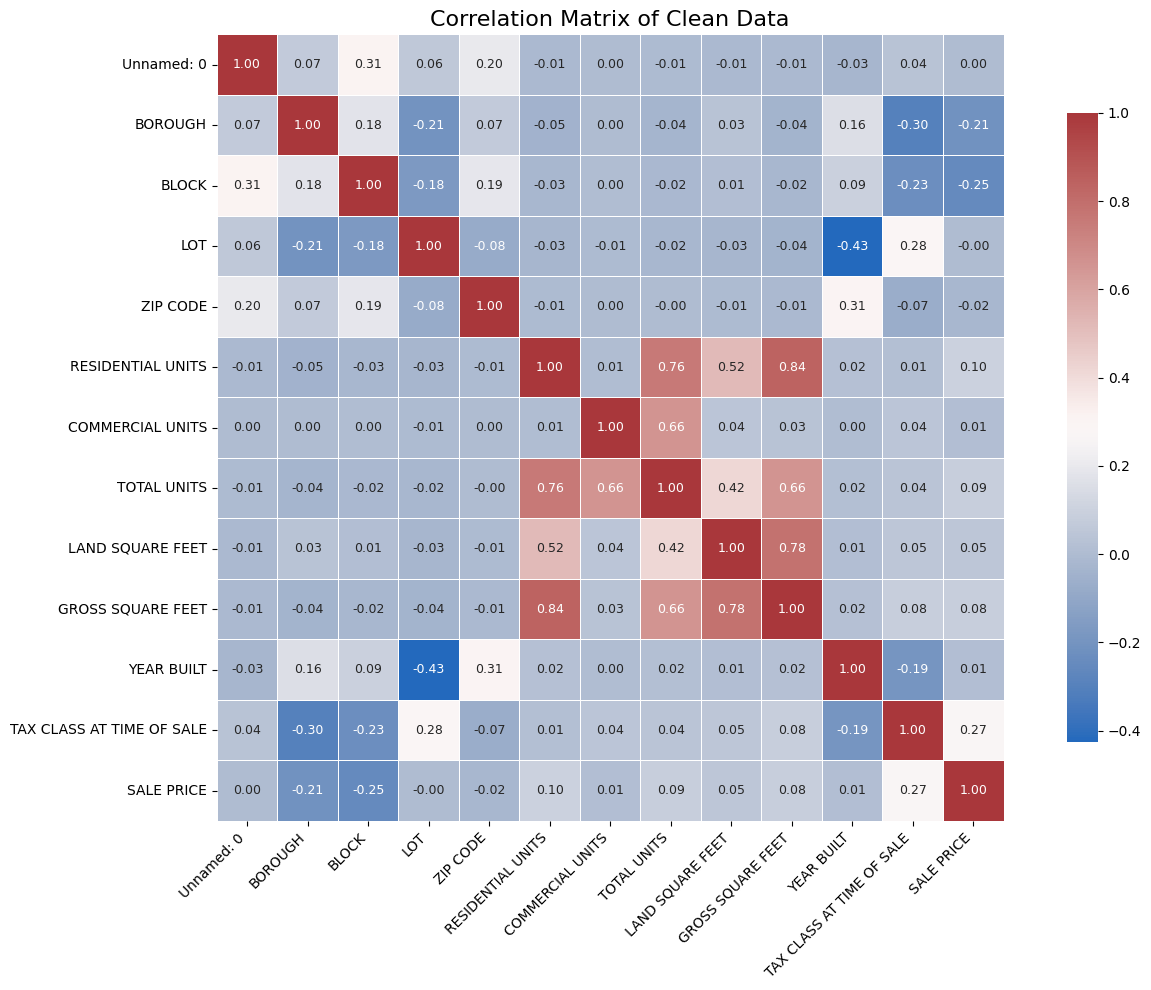

In [53]:
# Visualizing the correlation matrix after data cleaning
# This heatmap helps to understand the relationships between numerical features in the cleaned dataset.

df_clean_numbers = df_clean.select_dtypes(include=numpy.number)
corr_clean = df_clean_numbers.corr()

pyplot.figure(figsize=(14, 10))

seaborn.heatmap(
    corr_clean,
    cmap="vlag",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True,
    annot_kws={"size": 9}
)

pyplot.title("Correlation Matrix of Clean Data", fontsize=16)
pyplot.xticks(rotation=45, ha="right", fontsize=10)
pyplot.yticks(fontsize=10)
pyplot.tight_layout()
pyplot.show()

## 5. Encoding  
Categorical variables are encoded and new features are created for modeling.  
*(Kategorik değişkenler kodlanır ve modelleme için yeni özellikler oluşturulur.)*

The `BOROUGH` and `TAX CLASS AT TIME OF SALE` columns are one-hot encoded to convert categorical data into numerical format. Additionally, a new feature called `BUILD_AGE` is created by subtracting `YEAR_BUILT` from the sale year. All encoded and newly created features are combined into a single dataframe for further analysis.  
*(`BOROUGH` ve `TAX CLASS AT TIME OF SALE` sütunları, kategorik verileri sayısal formata dönüştürmek için one-hot encoding yöntemiyle kodlanır. Ayrıca, satış yılı ile `YEAR_BUILT` arasındaki fark alınarak `BUILD_AGE` adlı yeni bir özellik oluşturulur. Tüm kodlanmış ve yeni oluşturulan özellikler, sonraki analizler için tek bir veri çerçevesinde birleştirilir.)*

In [54]:
# BOROUGH: One-hot encoding
df_clean[Col.BOROUGH] = df_clean[Col.BOROUGH].astype(str)
borough_ohe = pandas.get_dummies(df_clean[Col.BOROUGH], prefix=Col.BOROUGH)

# BUILD_AGE: SALE_DATE-YEAR_BUILT
df_clean["SALE_YEAR"] = pandas.to_datetime(df_clean[Col.SALE_DATE]).dt.year
df_clean["BUILD_AGE"] = df_clean["SALE_YEAR"] - df_clean[Col.YEAR_BUILT]

# TAX CLASS AT TIME OF SALE: One-hot encoding
taxclass_ohe = pandas.get_dummies(df_clean[Col.TAX_CLASS_AT_TIME_OF_SALE].astype(str), prefix="TAXCLS")

df_encoded = pandas.concat([
    df_clean.drop([Col.BOROUGH, Col.TAX_CLASS_AT_TIME_OF_SALE, Col.SALE_DATE], axis=1),
    borough_ohe,
    taxclass_ohe
], axis=1)


## 6. Feature & Target Selection  
Drop identifier columns and split into features and target.  
*(Kimlik sütunlarını çıkarıp özellik ve hedefi ayıralım.)*

Columns that are not useful for modeling (such as IDs, addresses, and other identifiers) are dropped from the dataset. The remaining columns are separated into features (`X`) and the target variable (`y`, which is `SALE PRICE`).  
*(Modelleme için faydalı olmayan sütunlar (ID, adres, vb.) veri setinden çıkarılır. Kalan sütunlar özellikler (`X`) ve hedef değişken (`y`, yani `SALE PRICE`) olarak ayrılır.)*

In [55]:
# drop columns that are not needed for analysis
drop_cols = [
    Col.UNNAMED_0,
    Col.BLOCK,
    Col.LOT,
    Col.APARTMENT_NUMBER,
    Col.ADDRESS,
    Col.BUILDING_CLASS_AT_TIME_OF_SALE, 
    Col.BUILDING_CLASS_AT_PRESENT, 
    Col.TAX_CLASS_AT_PRESENT,
    Col.SALE_DATE,
    Col.EASE_MENT
]

feature_cols = [col for col in df_encoded.columns if col not in drop_cols + [target]]

X = df_encoded[feature_cols]
y = df_encoded[target]

# Model Training / Model Eğitimi

## 7. Train/Test Split  

The dataset is split into training and test sets to evaluate model performance.  
*(Modelin başarısını değerlendirmek için veri eğitim ve test kümelerine ayrılır.)*

Additionally, after splitting, target encoding is applied to the `ZIP CODE` column using the mean of the `SALE PRICE` in the training set. This new feature (`ZIP_CODE_MEAN_PRICE`) is added to both train and test sets to help the model capture location-based price differences.  
*(Ayrıca, ayırma işleminden sonra eğitim kümesindeki `SALE PRICE` ortalaması kullanılarak `ZIP CODE` sütununa target encoding uygulanır. Oluşturulan bu yeni özellik (`ZIP_CODE_MEAN_PRICE`), hem eğitim hem de test kümelerine eklenerek modelin lokasyona bağlı fiyat farklarını öğrenmesine yardımcı olur.)*

In [56]:
# Applying log transformation to the target variable
y = numpy.log1p(df_encoded[target])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# This operation should be done after train-test split to avoid data leakage

# Target encoding for ZIP CODE
zip_mean = X_train.copy()
zip_mean[Col.SALE_PRICE] = y_train
zip_code_target_map = zip_mean.groupby(Col.ZIP_CODE)[Col.SALE_PRICE].mean()

# Adding ZIP_CODE_MEAN_PRICE to train and test sets
X_train["ZIP_CODE_MEAN_PRICE"] = X_train[Col.ZIP_CODE].map(zip_code_target_map)
X_test["ZIP_CODE_MEAN_PRICE"] = X_test[Col.ZIP_CODE].map(zip_code_target_map)

# Fill NaN values in ZIP_CODE_MEAN_PRICE with the overall mean of SALE_PRICE
overall_mean = y_train.mean()
X_test["ZIP_CODE_MEAN_PRICE"] = X_test["ZIP_CODE_MEAN_PRICE"].fillna(overall_mean)

## 8. Pipeline & Hyperparameter Tuning  
Apply Ridge and XGBoost regression pipelines with GridSearchCV.  
*(Ridge ve XGBoost regresyon pipeline’ları ile GridSearchCV uygulayalım.)*

In this step, machine learning pipelines are created for Ridge and XGBoost regression models. Both pipelines include preprocessing steps for numerical and categorical features. Hyperparameter tuning is performed using GridSearchCV to find the best model parameters.  
*(Bu adımda, Ridge ve XGBoost regresyon modelleri için makine öğrenmesi pipeline’ları oluşturulur. Pipeline’larda sayısal ve kategorik değişkenler için ön işleme adımları yer alır. En iyi model parametrelerini bulmak için GridSearchCV ile hiperparametre optimizasyonu yapılır.)*

In [ ]:
# Ridge Regression Pipeline

# defining categorical and numerical columns
cat_cols = X.select_dtypes(include=numpy.object_).columns.tolist()
num_cols = X.select_dtypes(include=numpy.number).columns.tolist()

print("Categorical columns:", cat_cols)
print("X types: ", X.dtypes[X.dtypes == "object"])

# creating a preprocessor for numerical and categorical columns
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

ridge_pipe = Pipeline([
    ("prep", preprocessor),
    ("reg", Ridge(solver="lsqr"))
])
ridge_params = {"reg__alpha": [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(ridge_pipe, ridge_params, cv=5, scoring="neg_mean_squared_error")
ridge_grid.fit(X_train, y_train)

Categorical columns: ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY']
X types:  NEIGHBORHOOD               object
BUILDING CLASS CATEGORY    object
dtype: object


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ZIP '
                                                                          'CODE',
                                                                          'RESIDENTIAL '
                                                                          'UNITS',
                                                                          'COMMERCIAL '
                                                                          'UNITS',
                                                                          'TOTAL '
                                                                          'UNITS',
                                                                          'LAND '
                                                                          'SQUARE '
                                                                          'FEET',
                                                                          'GROSS '
                                                                          'SQUARE '
                                                                          'FEET',
                                                                          'YEAR '
                                                                          'BUILT',
                                                                          'SALE_YEAR',
                                                                          'BUILD_AGE']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['NEIGHBORHOOD',
                                                                          'BUILDING '
                                                                          'CLASS '
                                                                          'CATEGORY'])])),
                                       ('reg', Ridge(solver='lsqr'))]),
             param_grid={'reg__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [59]:
# XGBoost Regression Pipeline
xgb_pipe = Pipeline([
    ("prep", preprocessor),
    ("reg", XGBRegressor(objective="reg:squarederror", random_state=42))
])
xgb_params = {"reg__n_estimators": [100, 200], "reg__max_depth": [3, 5]}
xgb_grid = GridSearchCV(xgb_pipe, xgb_params, cv=5, scoring="neg_mean_squared_error")
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ZIP '
                                                                          'CODE',
                                                                          'RESIDENTIAL '
                                                                          'UNITS',
                                                                          'COMMERCIAL '
                                                                          'UNITS',
                                                                          'TOTAL '
                                                                          'UNITS',
                                                                          'LAND '
                                                                          'SQUARE '
                                                                          'FEET',
                                                                          'GROSS '
                                                                          'SQUARE '
                                                                          'FEET',
                                                                          'YEAR '
                                                                          'BUILT',
                                                                          'SALE_YEAR',
                                                                          'BUILD_AGE']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['NEIGHBORHOOD',
                                                                          'BUILDING '
                                                                          'CLASS '
                                                                          'CATEGORY']...
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             param_grid={'reg__max_depth': [3, 5],
                         'reg__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

# Model Evaluation

## 9. Results  

Model performance is evaluated on the test set using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score. The results of both Ridge and XGBoost regression models are compared.  
*(Model performansı, test kümesi üzerinde Ortalama Kare Hatası (MSE), Ortalama Mutlak Hata (MAE) ve R² skoru gibi metriklerle değerlendirilir. Hem Ridge hem de XGBoost regresyon modellerinin sonuçları karşılaştırılır.)*

In [60]:
# Function to print regression results
def print_regression_results(model, X_test, y_test, name):
    y_pred_log = model.predict(X_test)
    y_pred = numpy.expm1(y_pred_log)
    y_true = numpy.expm1(y_test)
    print(f"{name} Results:")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))
    print()

print_regression_results(ridge_grid, X_test, y_test, "Ridge Regression")
print_regression_results(xgb_grid, X_test, y_test, "XGBoost Regression")

Ridge Regression Results:
MSE: 634145714237.5271
MAE: 341624.55239495164
R²: 0.4242615338184531

XGBoost Regression Results:
MSE: 373857025430.66846
MAE: 268704.41921631835
R²: 0.6605766378923655



## 10. Conclusion  

According to the results, the XGBoost regression model achieved a higher R² score compared to the Ridge regression model.  
*(Sonuçlara göre, XGBoost regresyon modeli Ridge modeline göre daha yüksek bir R² skoruna ulaşmıştır.)*

Therefore, XGBoost can be preferred for final predictions.  
*(Bu nedenle, nihai tahminler için XGBoost modeli tercih edilebilir.)*

To further improve model performance, important categorical variables such as NEIGHBORHOOD can also be included in the model.  
*(Model performansını artırmak için ek olarak NEIGHBORHOOD gibi önemli kategorik değişkenler de modele dahil edilebilir.)*

- Ridge Regression R²: 0.43  
- XGBoost Regression R²: 0.66  

These scores show that the model has achieved meaningful success in predicting sales prices.  
*(Bu skorlar, modelin satış fiyatı tahmininde anlamlı bir başarıya ulaştığını göstermektedir.)*